In [54]:
# IMPORTS

import numpy as np
from pyfiglet import Figlet

In [35]:
# CHARACTERISTICS

average_canadian_lifespan = 81.3
first_memories = 3
coma = [24, 25]
memory_fog_start = 60
covid = True
smoker = False
waterloo_student = True
drinks_per_year = 100
drinking = [19, 50]

lifespan = average_canadian_lifespan
if smoker:
    lifespan -= 10

In [ ]:
# SIMULATION

# {block_size}-year blocks (degree of accuracy)
block_size = 80

perceived_lives = 0
for i in np.arange(first_memories+(block_size/2), lifespan+(block_size/2), block_size):
    block = block_size
    if coma[0] <= i <= coma[1]:
        block *= 0
    if i >= memory_fog_start:
        block *= 0.5
    if waterloo_student and 18 < i < 23:
        block *= 0.75
    perceived_lives += block / (perceived_lives + block)

# for midlife: 2, for quarterlife: 4, etc.
crisis_multiple = 2

tmp = 0
for i in np.arange(first_memories+(block_size/2), lifespan+(block_size/2), block_size):
    block = block_size
    if coma[0] <= i <= coma[1]:
        block *= 0
    if i >= memory_fog_start:
        block *= 0.5
    if waterloo_student and 18 < i < 23:
        block *= 0.75
    tmp += block_size / (tmp + block_size)
    if tmp > perceived_lives / crisis_multiple:
        fig = Figlet(font='big')
        print(fig.renderText(f"Midlife crisis at {i} years old"))
        break

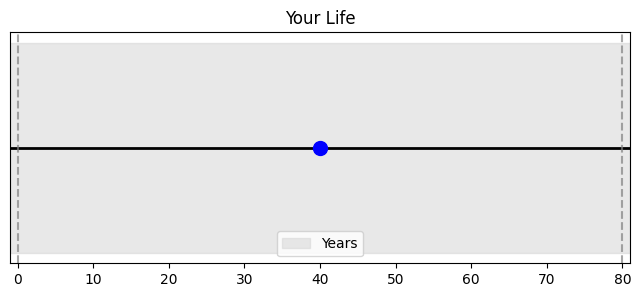

In [52]:
# VIZ

import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define section boundaries (the edges of each section)
boundaries = [0, 80]
# boundaries = [0, 20, 40, 60, 80]
# boundaries = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]

# Calculate midpoints of each section (i.e., the center between two boundaries)
midpoints = [(boundaries[i] + boundaries[i+1]) / 2 for i in range(len(boundaries) - 1)]

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(8, 3))

# Define the horizontal range for the scale with some padding
x_min = min(boundaries) - 1
x_max = max(boundaries) + 1

# Draw the horizontal scale as a rectangle
scale_height = 0.5  # Controls the vertical thickness of the scale
ax.add_patch(patches.Rectangle(
    (x_min, -scale_height / 2),  # Lower left corner (x, y)
    x_max - x_min,               # Width of the rectangle
    scale_height,                # Height of the rectangle
    color='lightgray',
    alpha=0.5,
    label='Years'
))

# Draw a prominent horizontal line along the center of the scale
ax.axhline(y=0, color='black', linewidth=2)

# (Optional) Draw vertical dashed lines at each boundary
for x in boundaries:
    ax.axvline(x=x, color='gray', linestyle='--', alpha=0.7)

# Plot the dots at the midpoints of each section (i.e., the center of each block)
for x in midpoints:
    ax.scatter(x, 0, color='blue', zorder=5, s=100)  # Adjust s for dot size

# Remove y-axis ticks since only the horizontal scale matters
ax.set_yticks([])

# Set x-axis limits to provide proper padding around the scale
ax.set_xlim(x_min, x_max)

# Add title and legend
ax.set_title("Your Life")
ax.legend()

# Display the plot
plt.show()
